In [1]:
import cv2
import numpy as np
import math

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


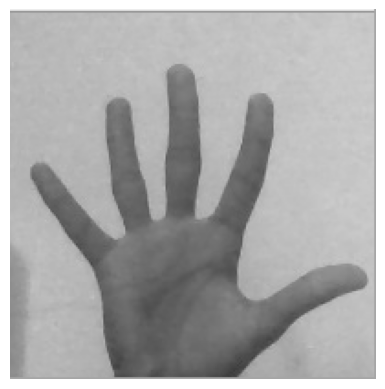

In [9]:
from matplotlib import pyplot as plt
img = cv2.imread("/content/gdrive/My Drive/ml/materials/hand.png")

plt.imshow(img)
plt.axis("off")
plt.show()

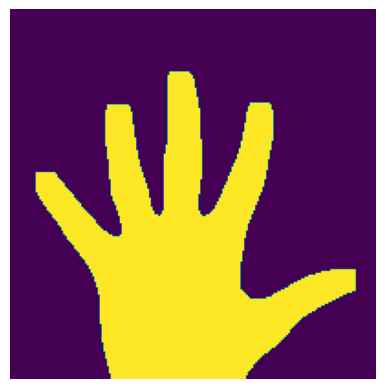

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (15,15), 0 )
_, threshed = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((3,3), dtype = np.uint8)
threshed = cv2.morphologyEx(threshed, cv2.MORPH_OPEN, kernel , iterations = 5 )
contours, hier = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
hull = cv2.convexHull(contours[0])
hull_work = cv2.convexHull(contours[0], returnPoints= False)
cv2.drawContours(img, contours, -1, (255,0,0), 2)
cv2.drawContours(img, hull, -1, (0,0,255), 3)

plt.imshow(threshed)
plt.axis("off")
plt.show()

0 152 79
152 274 224
284 386 331
459 523 495
534 697 597
698 851 772


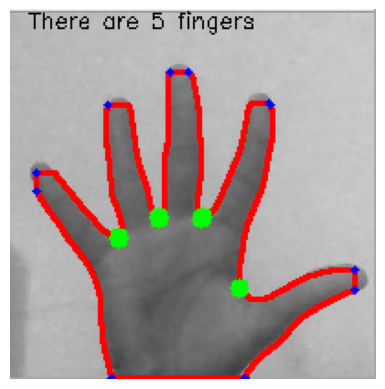

In [13]:
defects = cv2.convexityDefects(contours[0], hull_work)
count = 0
for i in range(len(defects)):
    s, e, f, _ = defects[i,0]
    print(s, e, f)
    start = contours[0][s][0]
    end = contours[0][e][0]
    far = contours[0][f][0]
    a = math.sqrt((end[0]-start[0])**2 + (end[1]-start[1])**2)
    b = math.sqrt((far[0]-start[0])**2 + (far[1]-start[1])**2)
    c = math.sqrt((end[0]-far[0])**2 + (end[1]-far[1])**2)
    angle = math.acos((b**2 + c**2 -a**2)/ (2 * b * c)) * 57
    if angle <= 90:
        count+=1
        cv2.circle(img, (far[0],far[1]), 5, (0,255,0), -1)
cv2.putText(img, "There are "+str(count+1)+" fingers", (10,10), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(0,0,0))

plt.imshow(img)
plt.axis("off")
plt.show()